In [31]:
import torch 
import matplotlib.pyplot as plt

In [32]:
torch.__version__

'2.1.2'

In [33]:
cuda = torch.device("cuda:0")
print("compatibility gpu")
print(torch.cuda.get_device_capability(device=cuda))
a = torch.tensor([11,11], device=cuda)
print(a+a)

compatibility gpu
(8, 6)
tensor([22, 22], device='cuda:0')


In [34]:
def f(x,theta):
    return x+theta

In [35]:
mb = 1024
x0 = torch.distributions.MultivariateNormal(loc=torch.tensor([1.0]),covariance_matrix=torch.tensor([[1.0]])).sample((mb,))

In [36]:
theta = 1
T = 20
xT = x0
for i in range(T):
    xT = f(xT,theta)
L_T = torch.mean((xT-1)**2)
print(L_T)

tensor(401.1658)


In [37]:
def deriv_L_T(T,theta):
    return 2*(T**2)*theta

In [38]:
deriveeL = deriv_L_T(T,theta)
print(deriveeL)

800


In [ ]:
T=20
lr = 0.1/(T**2)
nb_epoch = 50
epoch = 0
theta=1

L_t=[]
L_Derv = []

while epoch<nb_epoch:
    xT = torch.distributions.MultivariateNormal(loc=torch.tensor([1.0]),covariance_matrix=torch.tensor([[1.0]])).sample((mb,))
    for i in range(T):
        xT = f(xT,theta)
    L_t.append(torch.mean((xT-1)**2))
    L_derv= deriv_L_T(T, theta)
    L_Derv.append(L_derv)
    theta = theta - lr*L_derv
    epoch+=1

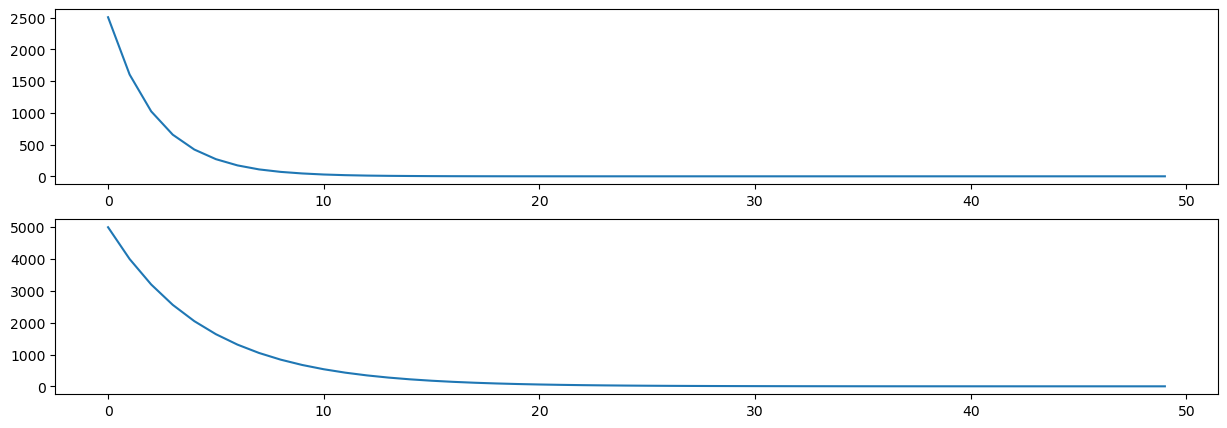

In [63]:
fig, axs = plt.subplots(2,1, figsize=(15,5))
axs[0].plot(L_t)
axs[1].plot(L_Derv)
plt.show()

### SGD

In [ ]:
theta = torch.tensor([1.0], requires_grad=True)
T=3
optimizer = torch.optim.SGD([theta], lr=lr)

In [66]:
nb_epoch = 50
list_LT = []
list_grad_LT = []

for epoch in range(nb_epoch):
    optimizer.zero_grad()
    xT = torch.distributions.MultivariateNormal(loc=torch.tensor([1.0]),covariance_matrix=torch.tensor([[1.0]])).sample((mb,))
    for i in range(T):
        xT = f(xT,theta)
    LT = torch.mean((xT-1)**2)
    LT.backward()
    optimizer.step()
    list_LT.append(LT.detach().numpy())
    list_grad_LT.append(theta.grad.detach().numpy())

print(theta)

tensor([0.1969], requires_grad=True)


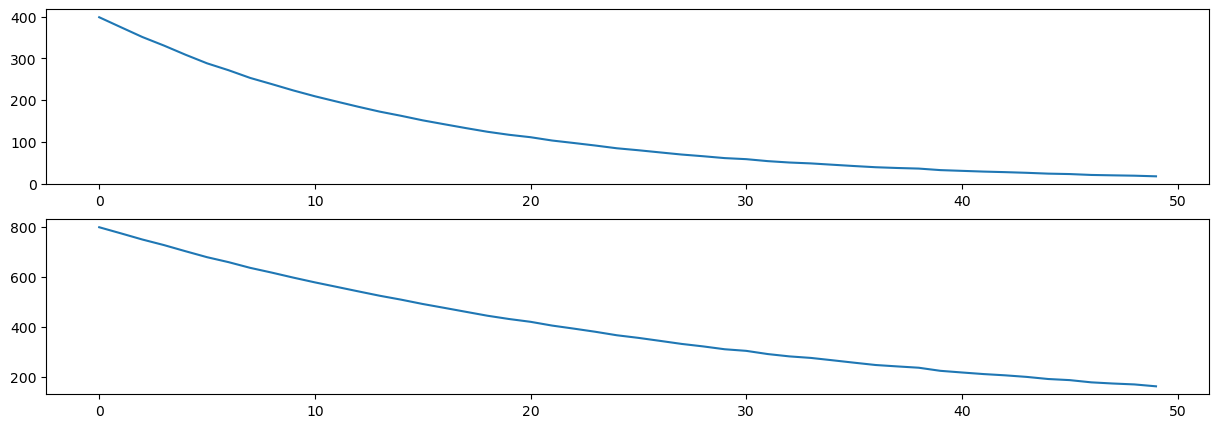

In [68]:
fig, axs = plt.subplots(2,1, figsize=(15,5))
axs[0].plot(list_LT)
axs[1].plot(list_grad_LT)
plt.show()

In [69]:
import torchviz

ModuleNotFoundError: No module named 'torchviz'

In [ ]:
torchviz.make_dot(LT) #T=3

NameError: name 'torchviz' is not defined